In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns

In [3]:
file_path = 'C:/Users/USER/Desktop/projects/prodigy/Tweets.csv'  
df = pd.read_csv(file_path)

In [4]:
df = df[['text', 'airline', 'tweet_created']]
df.dropna(inplace=True)

In [5]:
#  Preprocess the text
def preprocess_text(text):
    # Remove special characters and numbers
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    # Convert to lowercase
    text = text.lower()
    return text

In [6]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [7]:
#Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)

C:\Users\USER\AppData\Local\Temp\ipykernel_17476\4203990182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


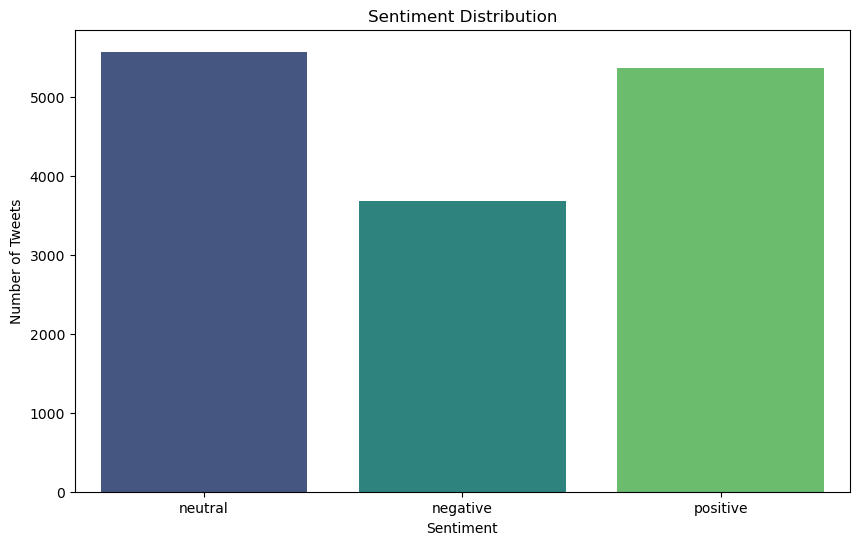

In [8]:
#visualizations

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

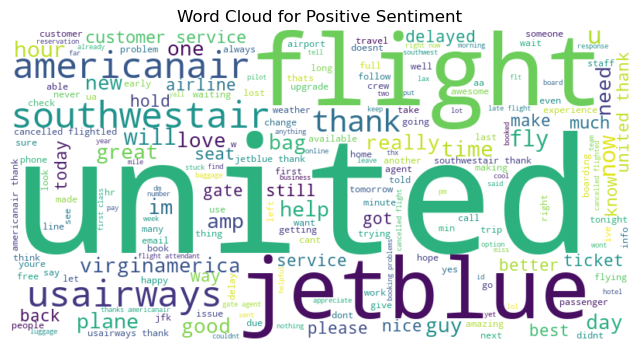

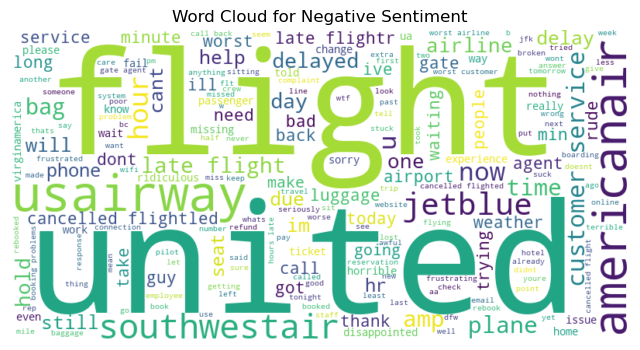

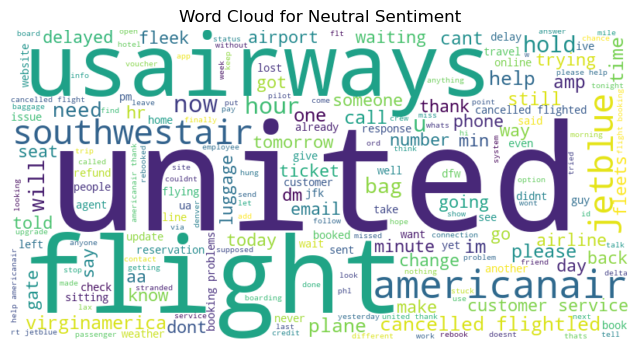

In [12]:
# Word cloud for each sentiment
sentiments = ['positive', 'negative', 'neutral']
for sentiment in sentiments:
    plt.figure(figsize=(8, 6))
    words = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [10]:
# Sentiment over time
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['date'] = df['tweet_created'].dt.date
sentiment_over_time = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

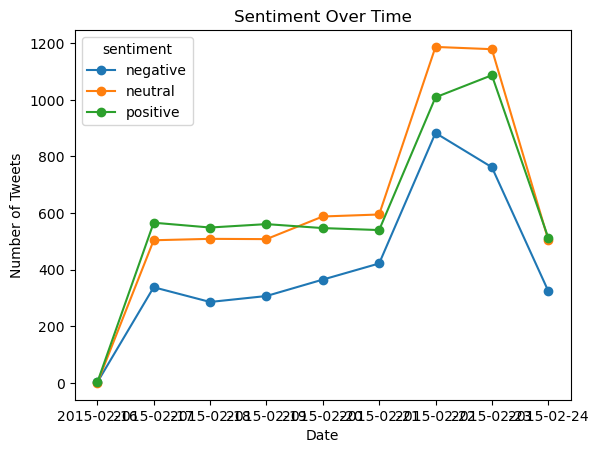

In [11]:
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()